In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.api as sm

In [20]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('data/all_data.csv', index_col='date', date_parser=dateparse, dtype='float')

/home/tatsuki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [21]:
data.head()

,total
date,
2020-01-15,1.0
2020-01-16,0.0
2020-01-17,0.0
2020-01-18,0.0
2020-01-19,0.0


In [22]:
ts = data['total']

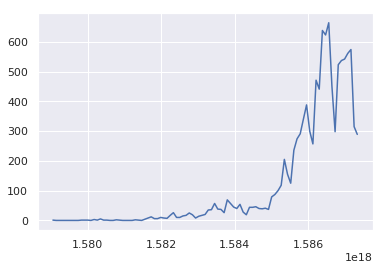

In [23]:
plt.plot(ts)

In [5]:
diff = ts.diff()
diff = diff.dropna()

In [6]:
params = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')

/home/tatsuki/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/tatsuki/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/tatsuki/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

In [7]:
print(params)

{'aic':              0            1            2
0          NaN  1055.125479  1054.226782
1  1055.344019  1054.737810  1055.721728
2  1055.676846  1055.374114  1058.681375
3  1056.655811  1056.810369          NaN
4  1057.383730  1057.394580  1027.192160, 'aic_min_order': (4, 2)}


In [8]:
from statsmodels.tsa.arima_model import ARIMA
arima_model = ARIMA(ts, order=(4,1,2)).fit(dist=False)

/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


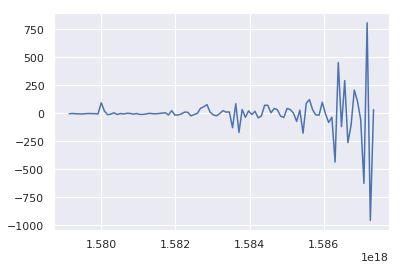

In [9]:
resid = arima_model.resid
plt.plot(resid)

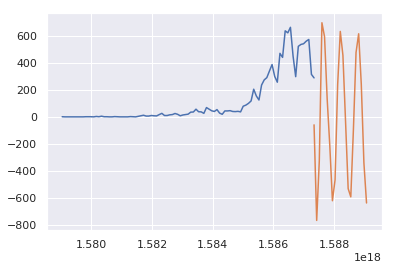

In [10]:
predict = arima_model.predict('2020-04-20', '2020-05-10')
plt.plot(ts) # 実データをプロット
plt.plot(predict) # 予測データをプロット

In [11]:
sarima_model = sm.tsa.SARIMAX(ts, order=(4,1,2), seasonal_order=(1,1,1,7)).fit()  # 1週間周期

/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/tatsuki/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


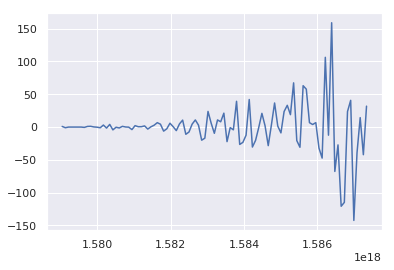

In [12]:
plt.plot(sarima_model.resid)

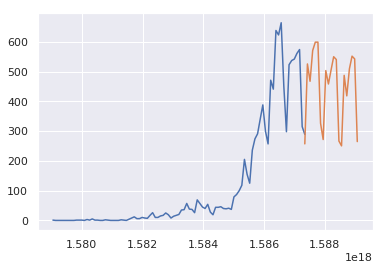

In [16]:
predict = sarima_model.predict('2020-04-20', '2020-05-10')
plt.plot(ts) # 実データをプロット
plt.plot(predict) # 予測データをプロット

In [14]:
print(predict)

2020-04-20    257.123005
2020-04-21    525.577980
2020-04-22    467.409044
2020-04-23    570.772345
2020-04-24    598.728784
2020-04-25    598.863825
2020-04-26    326.529189
2020-04-27    271.717508
2020-04-28    503.258911
2020-04-29    458.227151
2020-04-30    504.899396
2020-05-01    549.821117
2020-05-02    540.478544
2020-05-03    266.606328
2020-05-04    250.420358
2020-05-05    487.296979
2020-05-06    418.376022
2020-05-07    509.123157
2020-05-08    551.763120
2020-05-09    542.583485
2020-05-10    264.735028
Freq: D, dtype: float64
